## The SIR model



In [1]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)


In [2]:
%matplotlib inline
import numpy as np
import nodgeo
import matplotlib.pyplot as plt
#from matplotlib import rc; rc('text', usetex=True)

In [3]:
M=1
Nd    = 12              # number of nodes
Ni = 1000*np.ones(Nd)   # so there is only one age group 
N = np.sum(Ni)         # and the total population is the size of this age group

beta  = 0.2            # infection rate 
gI    = 0.1            # recovery rate of asymptomatic infectives 
alpha = 0              # fraction of asymptomatic infectives 

Wo =np.array(([1, 5],
              [0,2],
              [1,3],
              [2,4],
              [3,5]))

Tr =np.array(([1, 5],
              [0,2],
              [1,3],
              [2,4],
              [3,5]))



I0  = np.ones(Nd)     # the SIR model has only one kind of infective 
R0  = np.zeros(Nd)     # and assume there are no recovered individuals initially 
S0  = Ni-(I0+R0)    # so that the initial susceptibles are obtained from S + Ia + Is + R = N

# there is no contact structure
def contactMatrix(t):   
    return np.identity(M) 

# duration of simulation and data file
Tf = 160;  Nt=160; 

rW, rT=0,0
# instantiate model
parameters = {'beta':beta, 'gI':gI, 'rW':rW, 'rT':rT}
model = nodgeo.deterministic.SIR(parameters, Nd, M, Ni, Wo, Tr)

# simulate model 
data = model.simulate(S0, I0, contactMatrix, Tf, Nt, nodeInteraction='False')

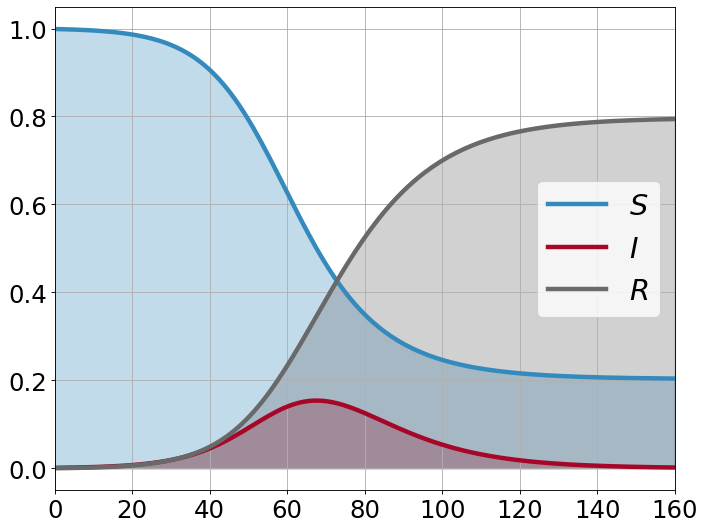

In [4]:
# plot the data and obtain the epidemic curve
tNo=4
S = data['X'][:,tNo].flatten()/Ni[0]
I = data['X'][:,tNo+Nd].flatten()/Ni[0]
t = data['t']


fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


plt.fill_between(t, 0, S, color="#348ABD", alpha=0.3)
plt.plot(t, S, '-', color="#348ABD", label='$S$', lw=4)

plt.fill_between(t, 0, I, color='#A60628', alpha=0.3)
plt.plot(t, I, '-', color='#A60628', label='$I$', lw=4)

R=1-S-I; plt.fill_between(t, 0, R, color="dimgrey", alpha=0.3)
plt.plot(t, R, '-', color="dimgrey", label='$R$', lw=4)


plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)

In [5]:
M=1
Nd    = 12              # number of nodes
Ni = 1000*np.ones(Nd)   # so there is only one age group 
N = np.sum(Ni)         # and the total population is the size of this age group

beta  = 0.2/24            # infection rate 
gI    = 0.1/24            # recovery rate of asymptomatic infectives 
 

Wo =np.array(([1, 5],
              [0,2],
              [1,3],
              [2,4],
              [3,5]))

Tr =np.array(([1, 5],
              [0,2],
              [1,3],
              [2,4],
              [3,5]))



I0  = np.ones(Nd)     # the SIR model has only one kind of infective 
R0  = np.zeros(Nd)     # and assume there are no recovered individuals initially 
S0  = Ni-(I0+R0)    # so that the initial susceptibles are obtained from S + Ia + Is + R = N

# there is no contact structure
def contactMatrix(t):   
    return np.identity(M) 

# duration of simulation and data file
Tf = 160*24;  Nt=160; 

rW, rT=0,0
# instantiate model
parameters = {'beta':beta, 'gI':gI, 'rW':rW, 'rT':rT}

model = nodgeo.deterministic.SIR(parameters, Nd, M, Ni, Wo, Tr)

# simulate model 
data = model.simulate(S0, I0, contactMatrix, Tf, Nt, nodeInteraction='False')

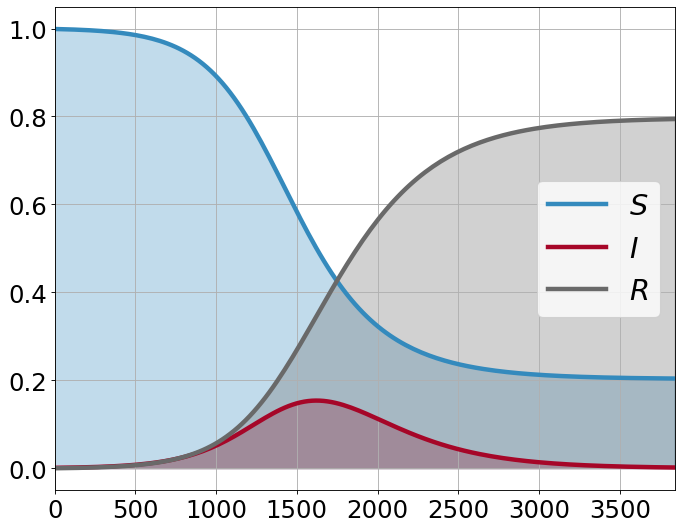

In [6]:
# plot the data and obtain the epidemic curve
tNo=4
S = data['X'][:,tNo].flatten()/Ni[0]
I = data['X'][:,tNo+Nd].flatten()/Ni[0]
t = data['t']


fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


plt.fill_between(t, 0, S, color="#348ABD", alpha=0.3)
plt.plot(t, S, '-', color="#348ABD", label='$S$', lw=4)

plt.fill_between(t, 0, I, color='#A60628', alpha=0.3)
plt.plot(t, I, '-', color='#A60628', label='$I$', lw=4)

R=1-S-I; plt.fill_between(t, 0, R, color="dimgrey", alpha=0.3)
plt.plot(t, R, '-', color="dimgrey", label='$R$', lw=4)


plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)